# Computational Mathematics  <a class="tocSkip">

## Introduction to Modelling with Mathematical/Computational Techniques <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Analysing-the-classical-form-of-the-logistic-map" data-toc-modified-id="Homework---Analysing-the-classical-form-of-the-logistic-map-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Analysing the classical form of the logistic map</a></span></li><li><span><a href="#Homework---Perturbations-in-the-logistic-map" data-toc-modified-id="Homework---Perturbations-in-the-logistic-map-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Perturbations in the logistic map</a></span></li><li><span><a href="#Homework---Taylor-series" data-toc-modified-id="Homework---Taylor-series-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Taylor series</a></span></li><li><span><a href="#Homework---Taylor-series-(convergence)" data-toc-modified-id="Homework---Taylor-series-(convergence)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Taylor series (convergence)</a></span></li><li><span><a href="#Homework---Taylor-series-(a-different-function-to-class)-[*]" data-toc-modified-id="Homework---Taylor-series-(a-different-function-to-class)-[*]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Taylor series (a different function to class) [*]</a></span></li><li><span><a href="#Homework---Big-O-notation-and-large/small-limits-[*]" data-toc-modified-id="Homework---Big-O-notation-and-large/small-limits-[*]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Big O notation and large/small limits [*]</a></span></li><li><span><a href="#Homework----Big-O-notation-and-an-error-example-with-very-different-coefficients-[*]" data-toc-modified-id="Homework----Big-O-notation-and-an-error-example-with-very-different-coefficients-[*]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework -  Big O notation and an error example with very different coefficients [*]</a></span></li><li><span><a href="#Homework---Ricker-model-[*]" data-toc-modified-id="Homework---Ricker-model-[*]-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Ricker model [*]</a></span></li><li><span><a href="#Homework---Exponential-decay-(or-relaxation)" data-toc-modified-id="Homework---Exponential-decay-(or-relaxation)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - Exponential decay (or relaxation)</a></span></li><li><span><a href="#Homework---Fibonacci-numbers-[*]" data-toc-modified-id="Homework---Fibonacci-numbers-[*]-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - Fibonacci numbers [*]</a></span></li></ul></li></ul></div>

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

In [5]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Homework

## Homework - Analysing the classical form of the logistic map

Recreate the analysis of the logistic map conducted in class for the initial form of the map, i.e. with the following code for RHS function.

Specifically plot the RHS; compute analytically and plot the fixed points; investigate the sensitivity of the results to different $x_0$ and $r$ values; and plot the bifurcation diagam.

In [6]:
def logistic_map(r, x):
    """A function giving the RHS of the discrete logistic map

    Parameters
    ----------
    r : float
        Growth rate parameter
    x : float
        Current population $x_n$, value from 0 to 1

    Returns
    -------
    float
        The updated population $x_{n+1} = r x_n (1-x_n)$
    """
    
    return r*x*(1-x)

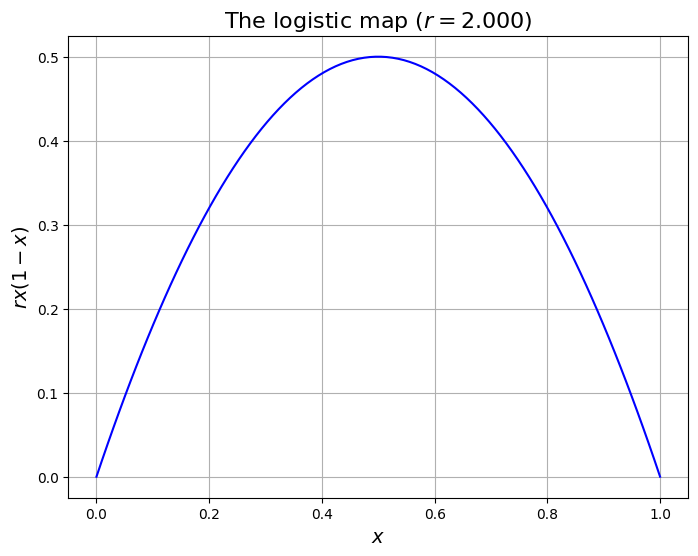

In [7]:
r = 2
x = np.linspace(0,1,100)
y = logistic_map(r,x)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(x,y,'b')
ax1.set_title('The logistic map ($r={0:.3f}$)'.format(r),fontsize=16)
ax1.set_xlabel('$x$',fontsize=14)
ax1.set_ylabel('$rx(1-x)$', fontsize=14)
ax1.grid(True)



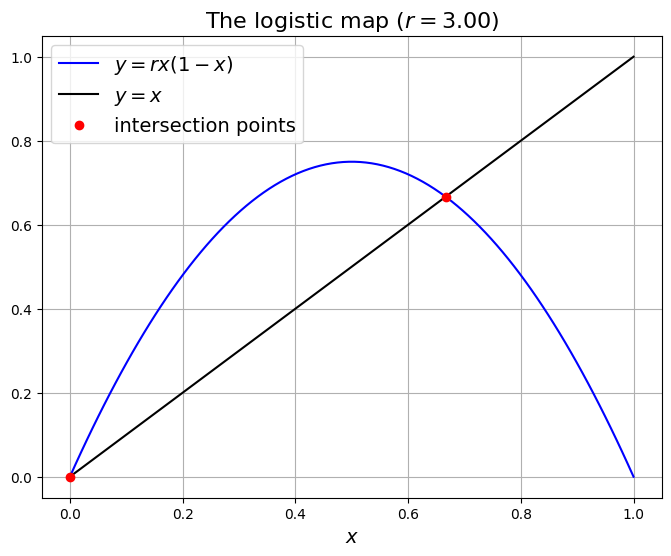

In [10]:
r = 3
x = np.linspace(0,1,100)
y = logistic_map(r,x)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.plot(x,y,'b',label=r'$y = rx(1-x)$')
ax1.set_title('The logistic map ($r = {0:.2f}$)'.format(r), fontsize=16)
ax1.set_xlabel('$x$', fontsize=14)
ax1.grid(True)

ax1.plot(x,x,'k',label=r'$y = x$')
ax1.plot(0,logistic_map(r,0), 'ro')
ax1.plot(1-1./r, logistic_map(r,1-1./r), 'ro', label='intersection points')
ax1.legend(loc='best', fontsize=14)


In [12]:
from cProfile import label


def plot_logistic_map_convergence(r,x0,iterations=10, ax=None):
    x = np.linspace(0,1,100)
    y = logistic_map(r,x)
    ax.plot(x,y,'b', label=r'$y = rx(1-x)$')
    ax.plot(x,x,'k',label=r'$y = x$')
    ax.set_title('The logistic map ($r={0:.2f}$)'.format(r),fontsize=16)
    ax.set_xlabel('$x$', fontsize=14)
    ax.grid(True)
    ax.legend(loc='best', fontsize=14)
    ax.plot(x0,x0,'go')
    x = x0
    for it in range(iterations):
        y = logistic_map(r,x)
        ax.plot([x,x],[x,y],'k--',linewidth=1)
        ax.plot([x,y],[y,y],'k--',linewidth=1)
        ax.plot(x,y,'ro',alpha=(it+1)/iterations)
        x=y

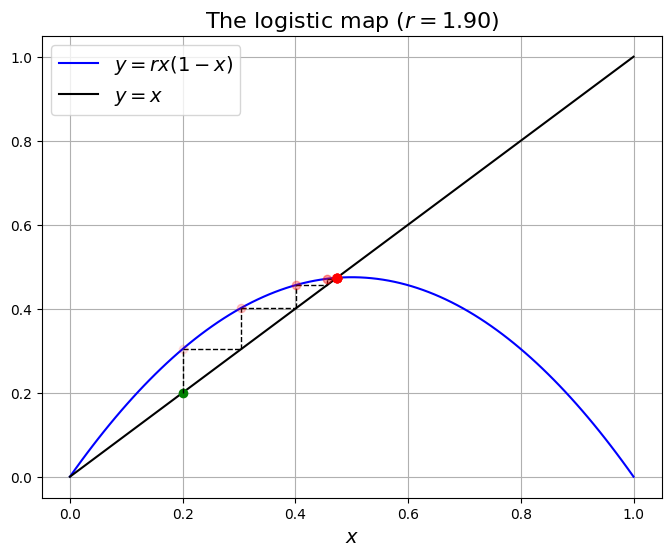

In [13]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
r = 1.9
x0 = 0.2
plot_logistic_map_convergence(r,x0,10,ax1)


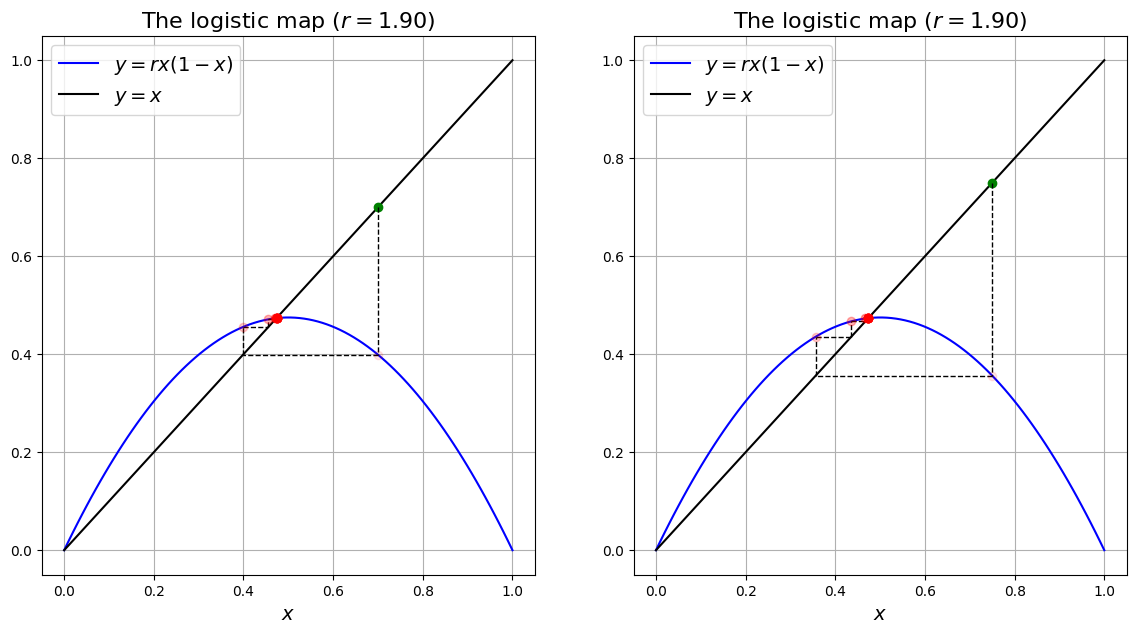

In [14]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
r = 1.9
x0 = 0.7
plot_logistic_map_convergence(r,x0,10,axs[0])
pert = 0.05
plot_logistic_map_convergence(r,x0+pert,10,axs[1]) 

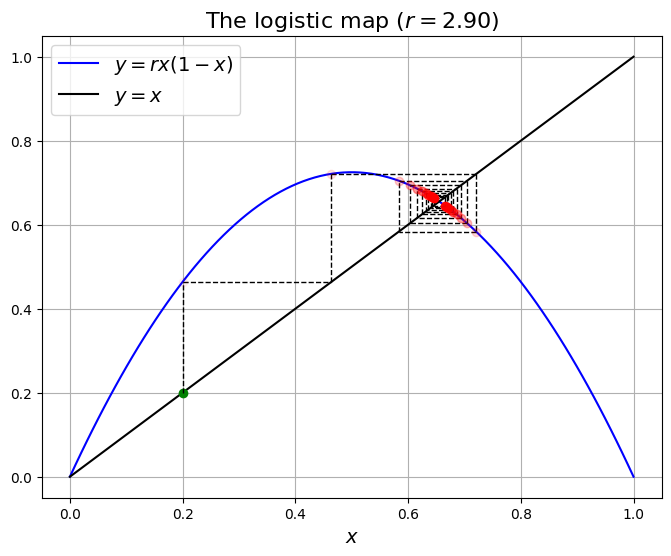

In [16]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

r = 2.9
x0 = 0.2
plot_logistic_map_convergence(r,x0,20,ax1)

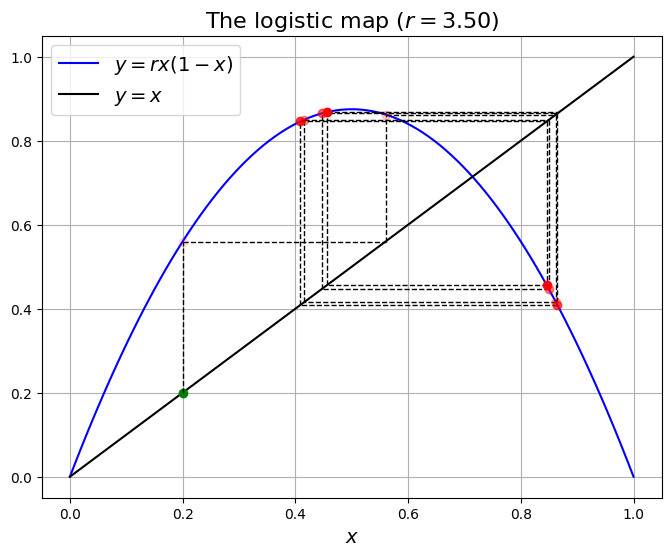

In [17]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

r = 3.5
x0 = 0.2
plot_logistic_map_convergence(r,x0,10,ax1)


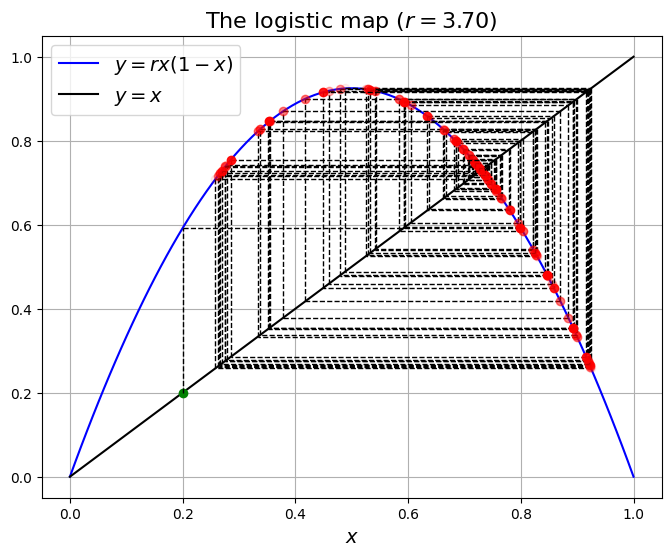

In [18]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

r = 3.7
x0 = 0.2
plot_logistic_map_convergence(r,x0,100,ax1)

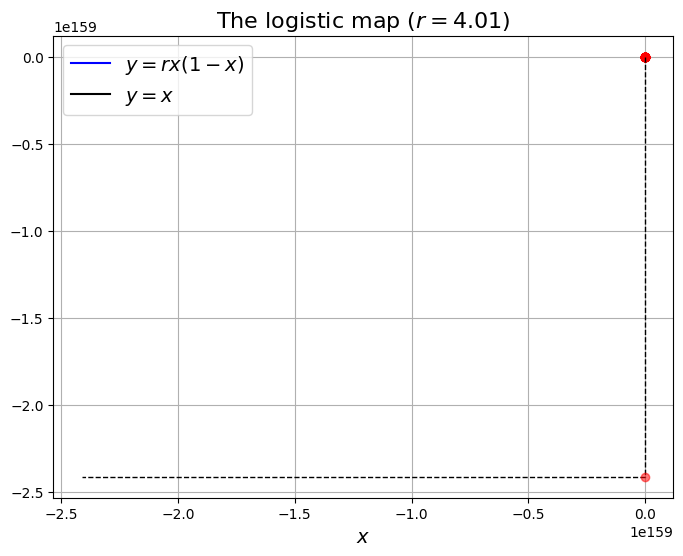

In [20]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
r = 4.01
x0 = 0.2
plot_logistic_map_convergence(r,x0,100,ax1)

Text(0, 0.5, 'Eventual Population')

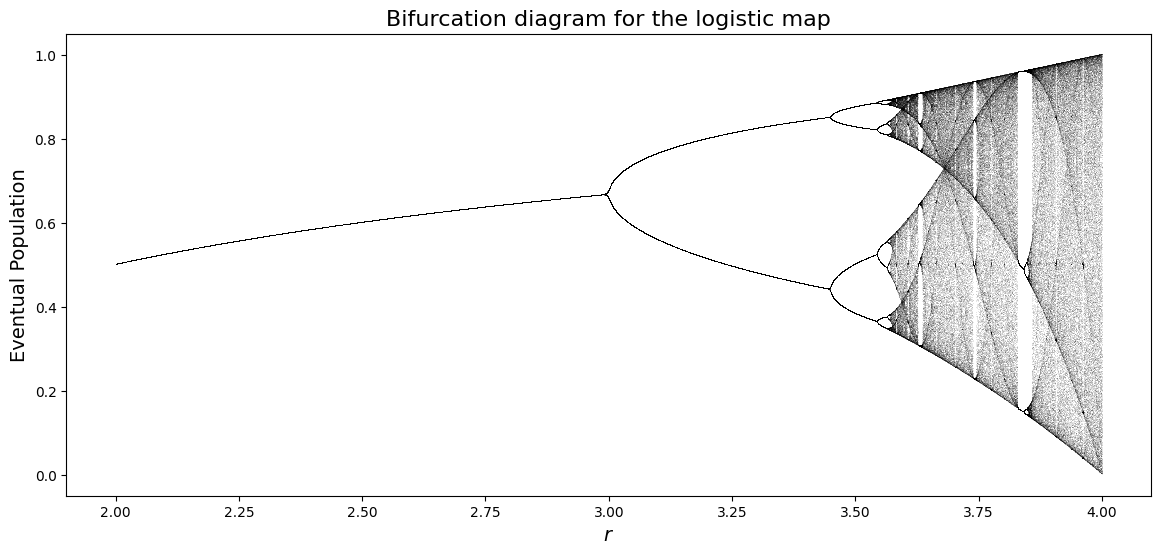

In [21]:
N = 10000
r = np.linspace(2.0, 4.0, N)
x = 0.1 * np.ones(N)
iterations = 500
values_to_plot = 100
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)
for it in range(iterations):
    x = logistic_map(r,x)
    if it>(iterations-values_to_plot):
        ax1.plot(r,x,'k,',alpha=0.1)
ax1.set_title('Bifurcation diagram for the logistic map', fontsize=16)
ax1.set_xlabel('$r$', fontsize=14)
ax1.set_ylabel('Eventual Population', fontsize=14)


## Homework - Perturbations in the logistic map

As mentioned in the lecture, compute and plot how the value of an initial perturbation in starting location varies with iteration number.

For example, you could write a function that takes two starting values (one the perturbation of the other) and plot how the difference between the two changes with iteration number.

Investigate how this changes with different starting points, perturbation size and choice of $r$.

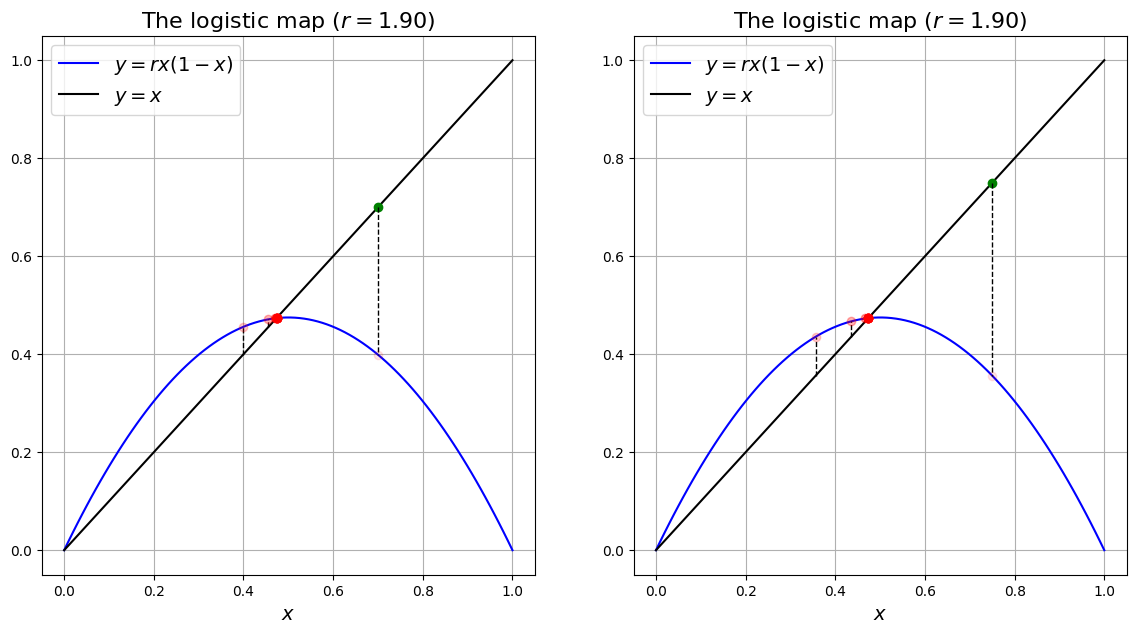

In [24]:
def logistic_map(r,x):
    return r*x*(1-x)

def plot_logistic_map_convergence(r,x0,iterations=10,ax=None):
    x = np.linspace(0,1,100)
    y = logistic_map(r,x)
    ax.plot(x,y,'b',label=r'$y = rx(1-x)$')
    ax.plot(x,x,'k',label=r'$y = x$')
    ax.set_title('The logistic map ($r={0:.2f}$)'.format(r),fontsize=16)
    ax.set_xlabel('$x$', fontsize=14)
    ax.grid(True)
    ax.legend(loc='best', fontsize=14)
    ax.plot(x0,x0,'go')
    x = x0
    for it in range(iterations):
        y = logistic_map(r,x)
        ax.plot([x,x],[x,y],'k--',linewidth=1)
        ax.plot([x,x],[y,y],'k--',linewidth=1)
        ax.plot(x,y,'ro', alpha=(it+1)/iterations)
        x=y
fig, axs = plt.subplots(1,2,figsize=(14,7))
r = 1.9
x0 = 0.7
plot_logistic_map_convergence(r,x0,10,axs[0])
pert = 0.05
plot_logistic_map_convergence(r,x0+pert, 10, axs[1])


In [25]:
def compute_logistic_map_pertubations(r,x1_0,x2_0,iterations=10):
    assert (0<x1_0<=1)
    assert (0<x2_0<=2)
    
    perts = np.zeros(iterations+1)
    perts[0] = x2_0 - x1_0
    x1 = x1_0#
    x2 = x2_0
    for it in range(iterations):
        y1 = logistic_map(r,x1)
        y2 = logistic_map(r,x2)
        perts[it + 1] = y2-y1
        x1 = y1
        x2 = y2
    return perts

Text(0, 0.5, '$x_n$')

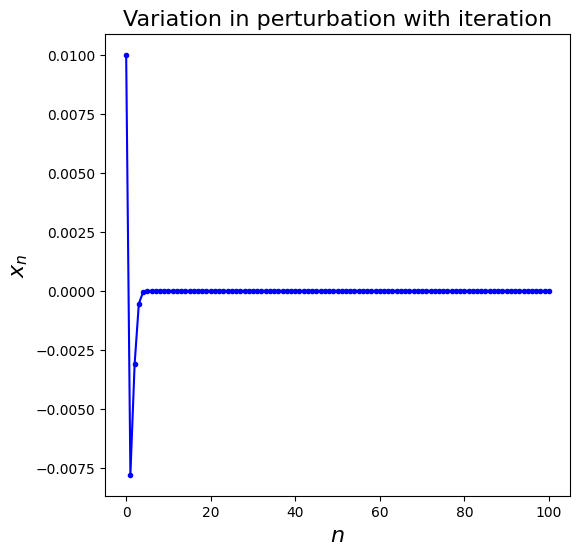

In [26]:
r = 1.9
x1_0 = 0.7
pert = 0.01
x2_0 = x1_0 +pert
perts = compute_logistic_map_pertubations(r,x1_0,x2_0,100)
    
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.set_title('Variation in perturbation with iteration', fontsize=16)
ax1.plot(range(len(perts)), perts, 'b.-')
ax1.set_xlabel('$n$', fontsize=16)
ax1.set_ylabel('$x_n$', fontsize=16)


Text(0, 0.5, '$x_n$')

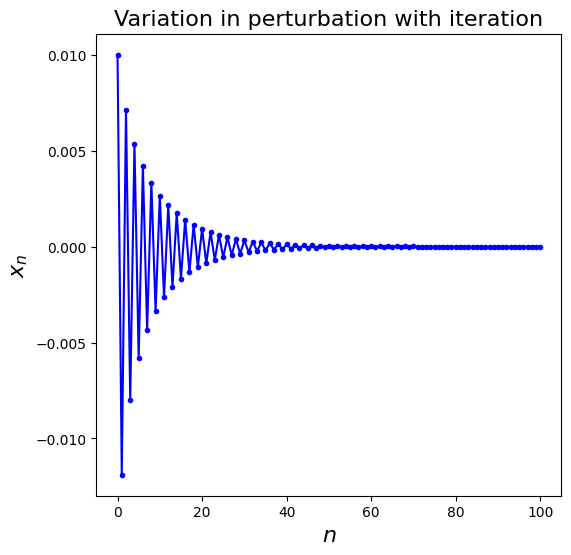

In [27]:
r = 2.9
x1_0 = 0.7
pert = 0.01
x2_0 = x1_0 + pert
perts = compute_logistic_map_pertubations(r,x1_0, x2_0,100)
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.set_title('Variation in perturbation with iteration', fontsize=16)
ax1.plot(range(len(perts)), perts, 'b.-')
ax1.set_xlabel('$n$', fontsize=16)
ax1.set_ylabel('$x_n$', fontsize=16)


Text(0, 0.5, '$x_n$')

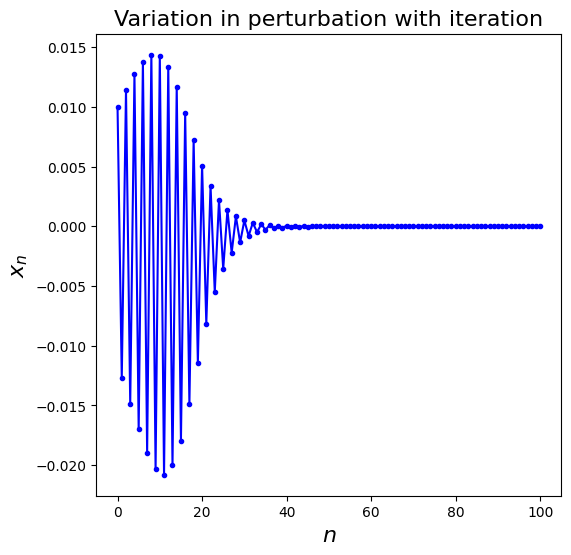

In [28]:
r = 3.1
x1_0 = 0.7
pert = 0.01
x2_0 = x1_0 + pert
perts = compute_logistic_map_pertubations(r,x1_0,x2_0,100)

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.set_title('Variation in perturbation with iteration', fontsize=16)
ax1.plot(range(len(perts)), perts, 'b.-')
ax1.set_xlabel('$n$', fontsize=16)
ax1.set_ylabel('$x_n$', fontsize=16)

Text(0, 0.5, '$x_n$')

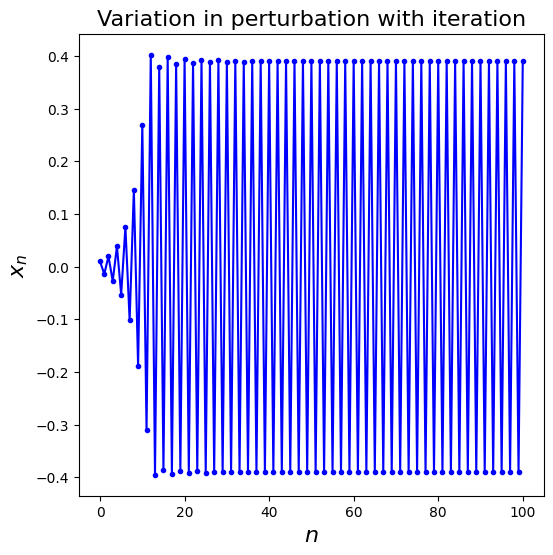

In [32]:
r = 3.4
x1_0 = 0.7
pert = 0.01
x2_0 = x1_0 + pert
perts = compute_logistic_map_pertubations(r, x1_0, x2_0, 100)

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.set_title('Variation in perturbation with iteration', fontsize=16)
ax1.plot(range(len(perts)), perts, 'b.-')
ax1.set_xlabel('$n$', fontsize=16)
ax1.set_ylabel('$x_n$', fontsize=16)

Text(0, 0.5, '$x_n$')

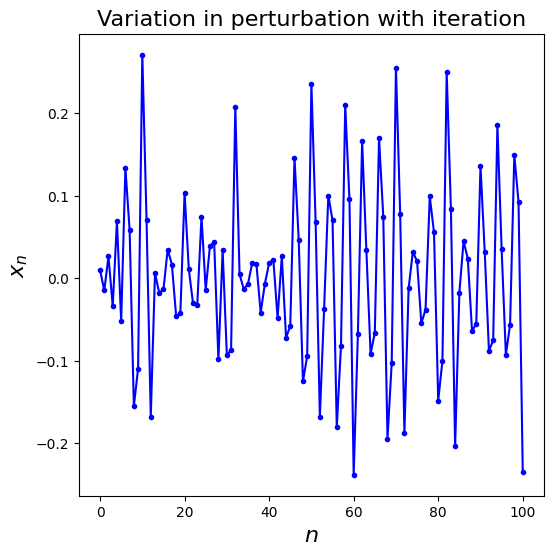

In [33]:
r = 3.6
x1_0 = 0.7
pert = 0.01
x2_0 = x1_0 + pert
perts = compute_logistic_map_pertubations(r,x1_0,x2_0,100)

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.set_title('Variation in perturbation with iteration', fontsize=16)
ax1.plot(range(len(perts)), perts, 'b.-')
ax1.set_xlabel('$n$', fontsize=16)
ax1.set_ylabel('$x_n$', fontsize=16)

## Homework - Taylor series

We saw an [animated gif from Wikipedia](https://en.wikipedia.org/wiki/Taylor_series#/media/File:Exp_series.gif) at the start of the lecture for how the Taylor series approximation to the exponential function, around the point $x=0$, more closely resembles the exponential function over the domain $[-3,3]$ as more terms are included in the expansion:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>


Write a script which computes and plots this approximation for increasing numbers of terms in the expansion (essentially recreating the individual frames that make up that animation).

In addition, plot the convergence of the RMS ("root mean square") error (you may need to look up what this is defined to be - we will go over in detail in L4) computed using 1000 points over the interval $[-3,3]$ against the number of terms included in the expansion on the x-axis.

Hint: since the derivative of $\exp(x)$ is also $\exp(x)$, you can re-use a single function for all the derivatives you require in the Taylor series expansion.  You won't be able to do this for other functions of course!

Text(0.5, 1.0, 'Error in Taylor series expansion\n as function of number of terms')

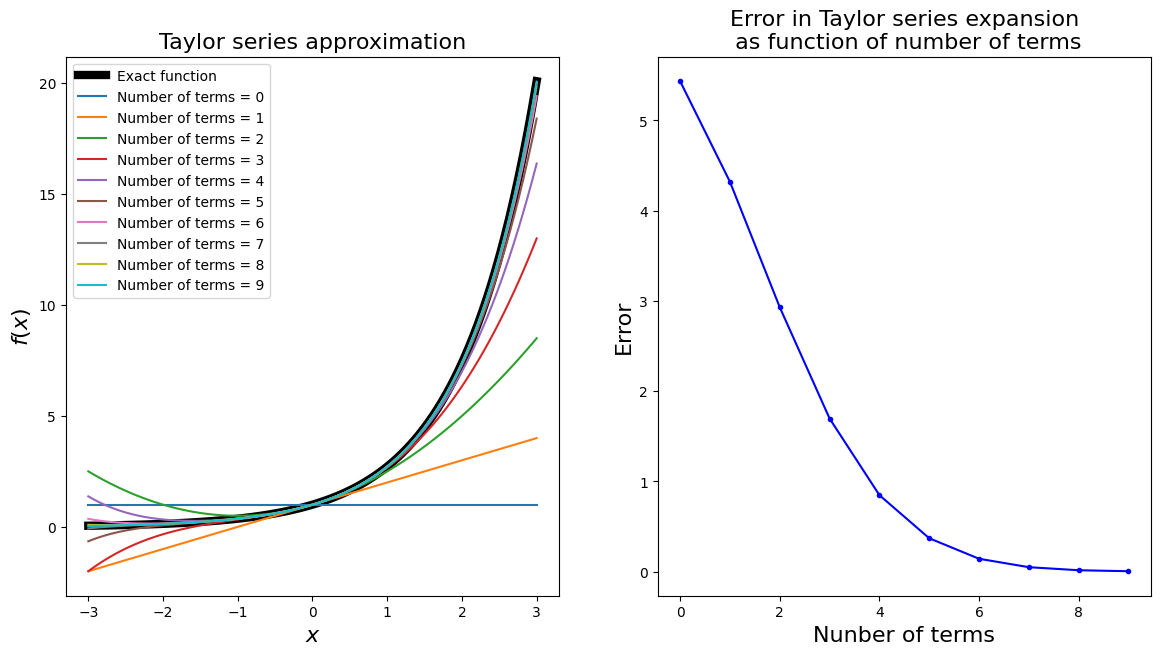

In [35]:
import fractions
from math import factorial

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(121)

ax1.set_title('Taylor series approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

def f(x):
    return np.exp(x)


x = np.linspace(-3,3,100)
ax1.plot(x,f(x),'k',lw=6,label='Exact function')
x0 = 0
taylor_series_expansion = np.zeros_like(x)
N = 10
errors = np.zeros(N)
for i in range(N):
    taylor_series_expansion += f(x0) * (x-x0)**i / factorial(i)
    errors[i] = np.linalg.norm(taylor_series_expansion - f(x))/ np.sqrt(len(x))
    ax1.plot(x,taylor_series_expansion,label='Number of terms = {0:1d}'.format(i))

ax1.legend(loc='best', fontsize=10)
ax2 = plt.subplot(122)
ax2.plot(range(N), errors, 'b.-')
ax2.set_xlabel('Nunber of terms', fontsize=16)
ax2.set_ylabel('Error', fontsize=16)
ax2.set_title('Error in Taylor series expansion\n as function of number of terms', fontsize=16)



## Homework - Taylor series (convergence)

Extending the example from the previous question.

Fix the number of terms in your Taylor series, i.e. truncate the series at the same term, and investigate how the error in your approximation decreases as you reduce how far you evaluate the approximation away from the expansion location.

That is, plot

$$| f(x_0 + h) - T(x_0 + h) |$$

i.e. the error at a single location, as a function of $h$, where $f$ is the true function (exp) and $T$ is your truncated Taylor series approximation.

Plot using a log-log plot - what slope line do you expect?

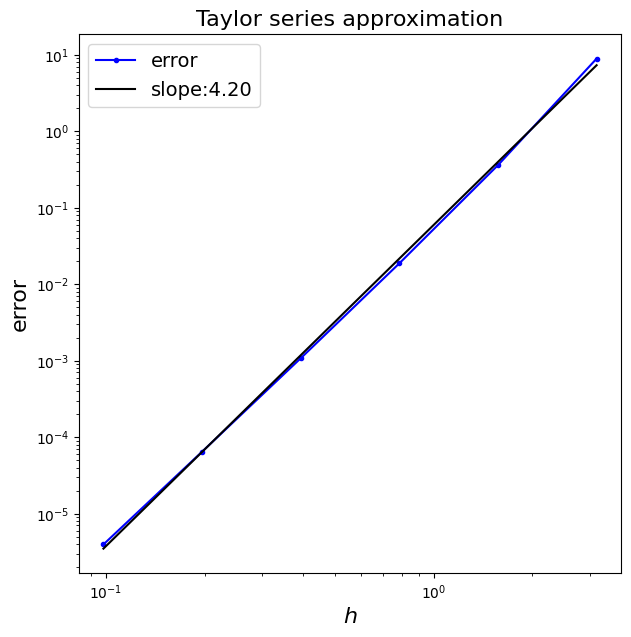

In [38]:
from math import factorial

fig = plt.figure(figsize=(7,7))
ax1 = plt.subplot(111)

ax1.set_title('Taylor series approximation', fontsize=16)
ax1.set_xlabel('$h$', fontsize=16)
ax1.set_ylabel('error', fontsize=16)

def f(x):
    return np.exp(x)

def taylor(f,order,x):
    taylor_series_expansion = np.zeros_like(x)
    for i in range(order):
        taylor_series_expansion += f(x0) * (x-x0)**i / factorial(i)
    return taylor_series_expansion

x0 = 0

N = 6
h = np.pi*(2.**(-1*np.arange(N)))
order = 4
errors = np.abs(f(x0+h) - taylor(f,order,x0+h))

ax1.loglog(h,errors,'b.-',label='error')

start_fit = 0
line_fit1 = np.polyfit(np.log(h[start_fit:]), np.log(errors[start_fit:]), 1)
ax1.loglog(h[start_fit:], np.exp(line_fit1[1]) * h[start_fit:]**(line_fit1[0]),'k',label='slope:{:.2f}'.format(line_fit1[0]))
ax1.legend(loc='best', fontsize=14)

<div class="optional">

## Homework - Taylor series (a different function to class) [*]

Repeat the previous exercise, but now consider the function $f(x) = \sin(x)$ for $x\in[-\pi/2,\pi/2]$ and an expansion point of $x_0 = 0$.

The big difference here is that you can't use the same $\exp$ function to represent $f$ and all its derivatives.

But the derivatives of trig functions are almost as easy.

</div>

Text(0.5, 1.0, 'Error in Taylor series expansion as function of terms')

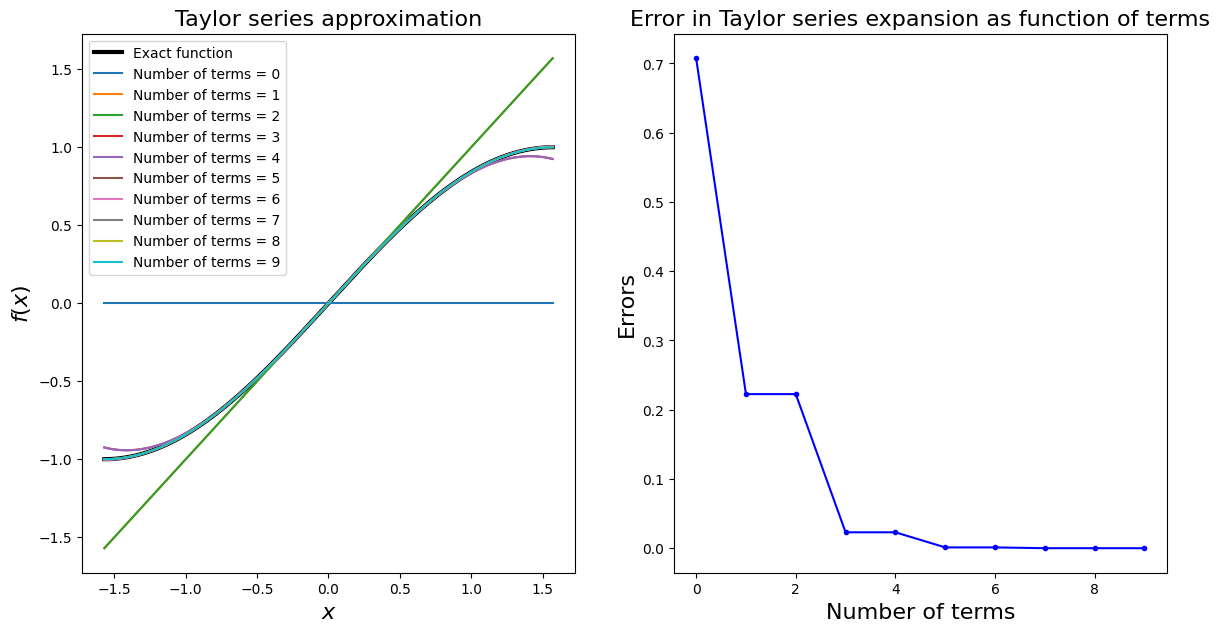

In [44]:
from math import factorial

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(121)

ax1.set_title('Taylor series approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

def f(x,deriv):
    if deriv%4 == 0:
        return np.sin(x)
    elif deriv%4 == 1:
        return np.cos(x)
    elif deriv%4 == 2:
        return -np.sin(x)
    elif deriv%4 == 3:
        return -np.cos(x)

x = np.linspace(-np.pi/2, np.pi/2, 1000)
ax1.plot(x,f(x,0), 'k', lw =3, label='Exact function')
x0 = 0.

taylor_series_expansion = np.zeros_like(x)
N = 10
errors = np.zeros(N)
for i in range(N):
    taylor_series_expansion += f(x0,i) * (x-x0) ** i / factorial(i)
    errors[i] = np.linalg.norm(taylor_series_expansion - f(x,0)) / np.sqrt(len(x))
    ax1.plot(x,taylor_series_expansion, label='Number of terms = {0:1d}'.format(i))

ax1.legend(loc='best', fontsize=10)
ax2 = plt.subplot(122)
ax2.plot(range(N), errors, 'b.-')
ax2.set_xlabel('Number of terms', fontsize=16)
ax2.set_ylabel('Errors', fontsize=16)
ax2.set_title('Error in Taylor series expansion as function of terms', fontsize=16)


<div class="optional">

## Homework - Big O notation and large/small limits [*]

Consider the example from class

$$g(y) = 3y^2 - y^3 + 9y^4$$

Use plots to convince yourself that

$$g(y) = \mathcal{O}(y^2) \quad\text{as}\quad y\rightarrow 0$$

and

$$g(y) = \mathcal{O}(y^4) \quad\text{as}\quad y\rightarrow \infty$$

i.e. plot the function $g(y)$, as well as functions $Cy^2$ and $Cy^4$ to convince yourself that, respectively, as long as you look at small or large enough values of $y$ these do indeed bound $g$. 

</div>

Text(0, 0.5, '$g(y)$')

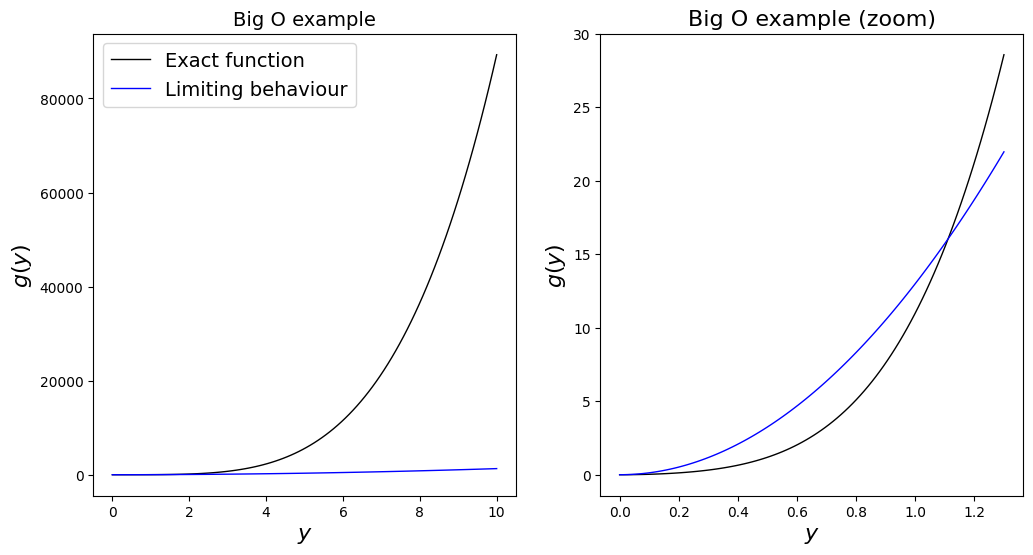

In [47]:
def g(y):
    return 3*y**2 - y**3 + 9*y**4

def g_bound_small(y):
    return 13*y**2

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
y = np.linspace(0,10,100)

ax1.plot(y,g(y),'k', lw=1, label='Exact function')
ax1.plot(y,g_bound_small(y), 'b', lw=1, label='Limiting behaviour')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$y$', fontsize=16)
ax1.set_ylabel('$g(y)$', fontsize=16)
ax1.set_title('Big O example', fontsize=14)

y = np.linspace(0,1.3,100)
ax2.plot(y,g(y), 'k', lw=1, label='Exact function')
ax2.plot(y,g_bound_small(y), 'b', lw=1, label='liniting behaviour')
ax2.set_title('Big O example (zoom)', fontsize=16)
ax2.set_xlabel('$y$', fontsize=16)
ax2.set_ylabel('$g(y)$', fontsize=16)



<div class="optional">

## Homework -  Big O notation and an error example with very different coefficients [\*]

Consider the example from class

$$\text{error} \approx 10^{-5}\Delta t +  10^{5}\Delta t^2$$

and convince yourself that for larger $\Delta t$ values the error drops quadratically (second-order), while at a point the decay drops to linear (first-order).

</div>

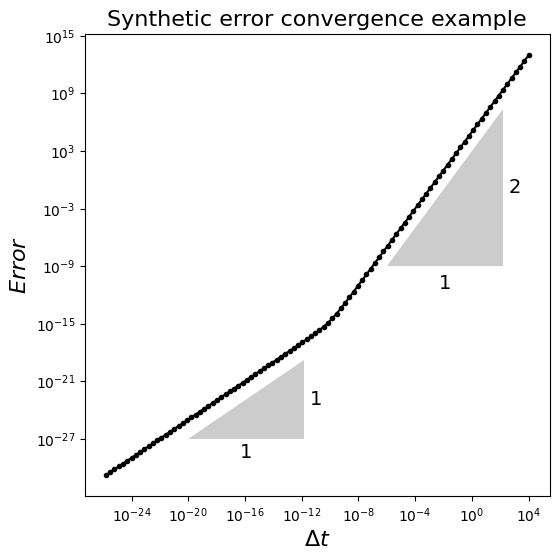

In [48]:
def err(dt):
    return 1e-5 *dt + 1e5 *(dt**2)

dt = np.array([1.e4 * 2 ** (-n) for n in range(100)])
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)

ax1.loglog(dt,err(dt), 'k.-')
ax1.set_title('Synthetic error convergence example', fontsize=16)
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('$Error$', fontsize=16)

annotation.slope_marker((1.e-20, 1e-27), (1,1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs=dict(fontsize=14))
annotation.slope_marker((1.e-6, 1e-9), (2,1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs=dict(fontsize=14))

<div class="optional">

## Homework - Ricker model [*]

Repeat our qualitative analysis of the discrete logistic map for the [Ricker map](https://en.wikipedia.org/wiki/Ricker_model), another classic model for population growth given by:
 
$$x_{n+1} = \exp(r(1-x_n))x_n$$

i.e. implement and plot its behaviour for different initial conditions and different $r$ parameters, and the bifurcation diagram.

</div>

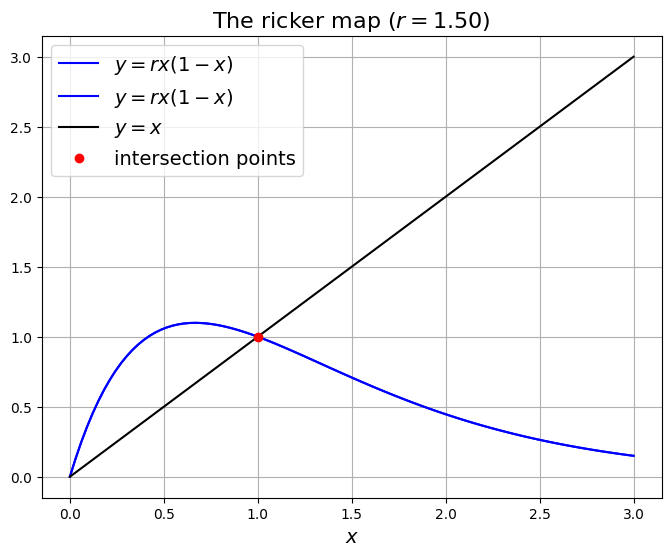

In [53]:
from matplotlib.font_manager import font_scalings


def ricker_map(r,x):
    return np.exp(r*(1-x))*x

r = 1.5
x = np.linspace(0,3,100)
y = ricker_map(r,x)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.plot(x,y,'b',label=r'$y=rx(1-x)$')
ax1.set_title('The ricker map ($r = {0:.2f}$)'.format(r),fontsize=16)
ax1.set_xlabel('$x$', fontsize=14)
ax1.grid(True)

ax1.plot(x,y,'b',label=r'$y=rx(1-x)$')
ax1.set_title('The ricker map ($r={0:.2f}$)'.format(r), fontsize=16)
ax1.set_xlabel('$x$', fontsize=14)
ax1.grid(True)

ax1.plot(x,x,'k',label=r'$y=x$')
ax1.plot(1,ricker_map(r,1.), 'ro', label='intersection points')
ax1.legend(loc='best', fontsize=14)




In [56]:
def plot_ricker_map_convergence(r,x0,iterations=10, ax=None):
    x = np.linspace(0,3,100)
    y = ricker_map(r,x)
    ax.plot(x,y,'b',label=r'$y = exp(r(1-x))$')
    ax.plot(x,x,'k', label=r'$y=x$')
    ax.set_title('The ricker map ($r={0:.2f}$)'.format(r), fontsize=16)
    ax.set_xlabel('$x$',fontsize=14)
    ax.grid(True)
    ax.legend(loc='best', fontsize=14)
    ax.plot(x0,x0,'go')
    x = x0
    
    for it in range(iterations):
        y = ricker_map(r,x)
        ax.plot([x,x],[x,y],'k--',linewidth=1)
        ax.plot([x,y],[y,y],'k--',linewidth=1)
        ax.plot(x,y,'ro',alpha=(it+1)/iterations)
        x=y

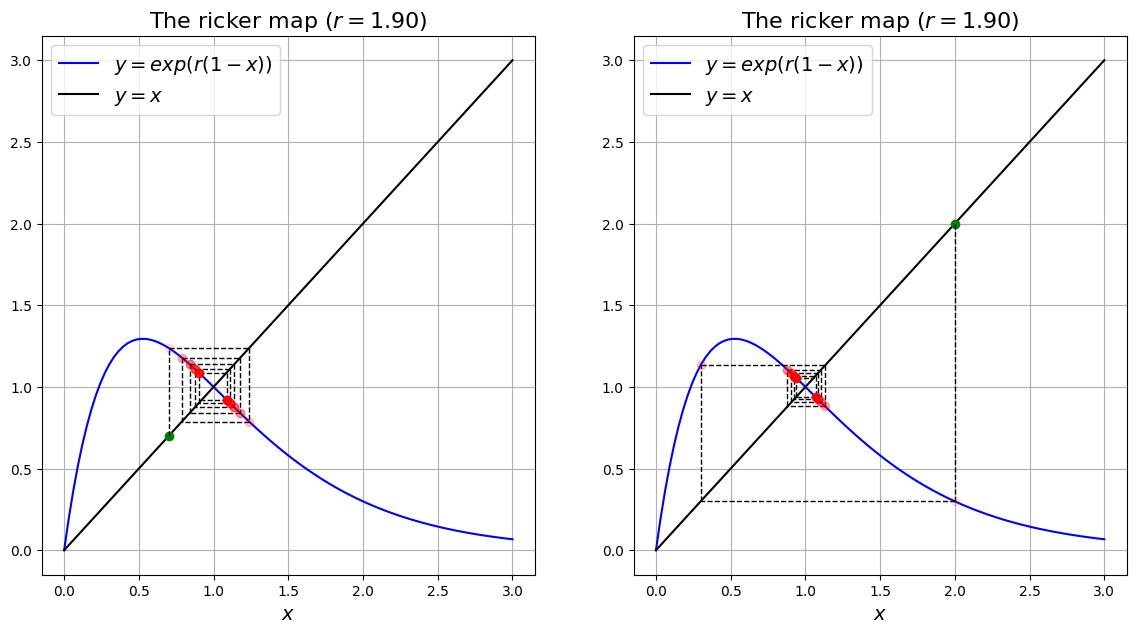

In [57]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

r = 1.9
x0 = 0.7
plot_ricker_map_convergence(r,x0,10,axs[0])
x0 = 2
plot_ricker_map_convergence(r,x0,10,axs[1])


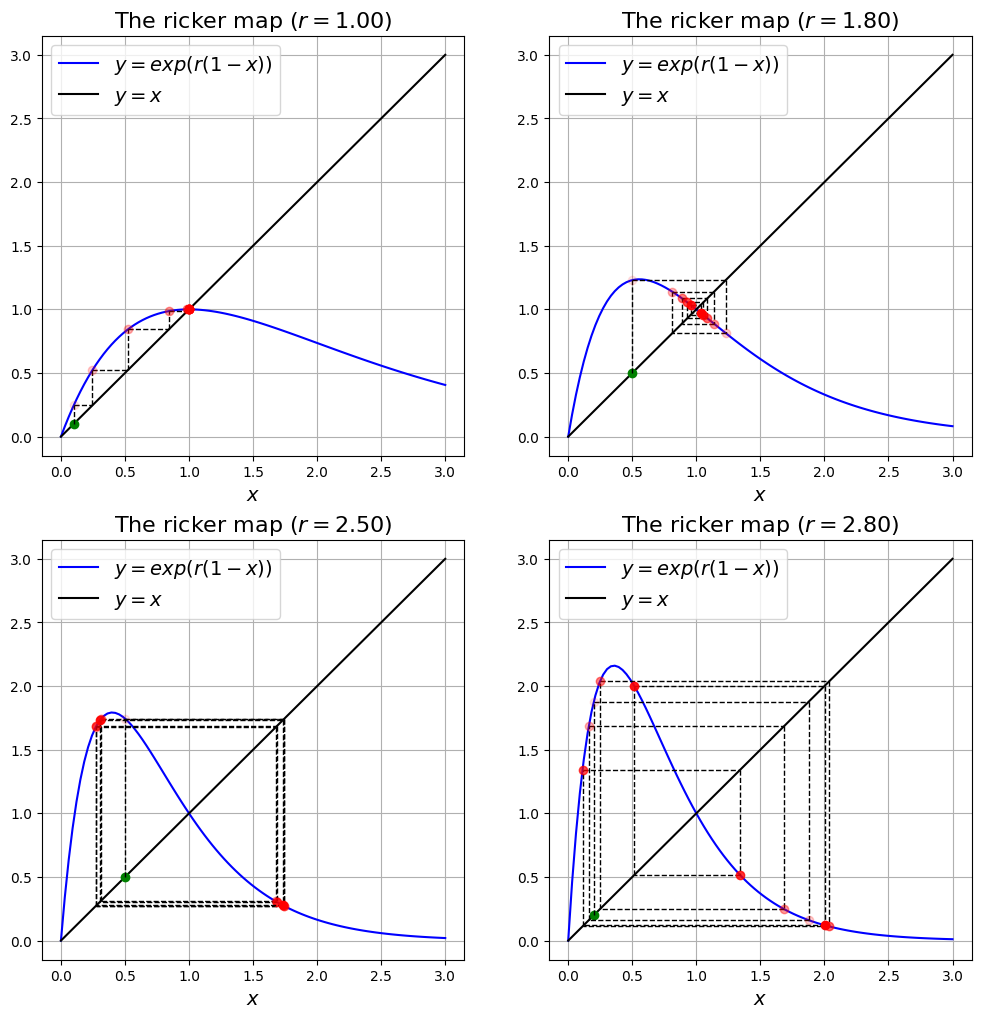

In [58]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
axs = axs.reshape(-1)
r = 1.0
x0 = 0.1
plot_ricker_map_convergence(r,x0,10,axs[0])

r = 1.8
x0 = 0.5
plot_ricker_map_convergence(r,x0,10,axs[1])

r = 2.5
x0 = 0.5
plot_ricker_map_convergence(r,x0,10,axs[2])

r = 2.8
x0 = 0.2
plot_ricker_map_convergence(r,x0,10,axs[3])

Text(0, 0.5, 'Eventual Population')

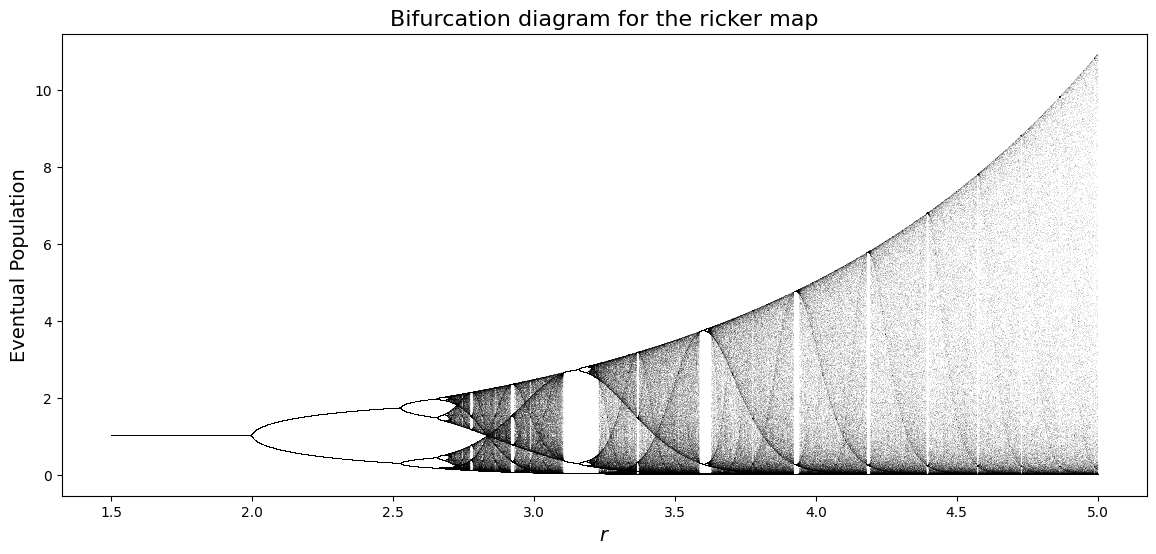

In [60]:
N = 10000
r = np.linspace(1.5,5.0,N)
x = 0.1*np.ones(N)
iterations =500
values_to_plot = 100
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)
for it in range(iterations):
    x = ricker_map(r,x)
    if it > (iterations-values_to_plot):
        ax1.plot(r,x,'k,',alpha=0.1)
ax1.set_title('Bifurcation diagram for the ricker map', fontsize=16)
ax1.set_xlabel('$r$', fontsize=14)
ax1.set_ylabel('Eventual Population', fontsize=14)
    

## Homework - Exponential decay (or relaxation)

This is an extension (both in terms of modelling physical processes, and numerics)
of the simple problem ($y'=y$) from lecture.

Exponential decay is a simple physical process governed by a relatively simple ODE. 

It also pops up all over the place:
<https://en.wikipedia.org/wiki/Exponential_decay#Applications_and_examples>.  

<br>

[This is a [link](<https://physicsworld.com/a/beer-paper-wins-ig-nobel-physics-prize/>) to an article about how the decay of beer froth following an exponential decay model won an [IgNobel Prize](https://www.improbable.com/ig/).  This is the paper <http://iopscience.iop.org/article/10.1088/0143-0807/23/1/304/meta>].

<br>

It is therefore an ideal initial test case for use to consider.

Better yet, it has an [analytical solution](http://mathworld.wolfram.com/Analytic.html) and hence also provides an excellent case for us to test our numerical methods against.

Consider the following model problem which we will see *relaxes* $C$ to a value $C_r$:

$$\frac{dC}{dt} = K(C_r - C),$$

where $K$ is a coefficient that dictates how quickly the relaxation occurs, and $C_r$ is the value which we are relaxing to (can you see what the units of $K$ must be?).

This is a first-order ODE, and so integrating it up w.r.t. time once leads to a single arbitrary [constant of integration](https://en.wikipedia.org/wiki/Constant_of_integration). 

To arrive at a unique solution we thus need a single piece of auxiliary data - e.g. an initial condition which will generally take the form of specifying the value of the unknown at the initial time: $C(0)$.

This problem has the exact (analytical) solution

$$ C(t) = C_r + (C(0) - C_r)\exp(-Kt).$$

It is evident, both from the ODE and the solution, that

$$ \lim_{t\rightarrow\infty} C(t) = C_r.$$

As an example, suppose $C_r$ is zero, then this problem can be used to describe radioactive decay where $K$ is the inverse half-life (should give you a further clue on what the units of $K$ are!).

Below is an example of decay to zero using the half life of carbon-14, as used in [radiocarbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating).

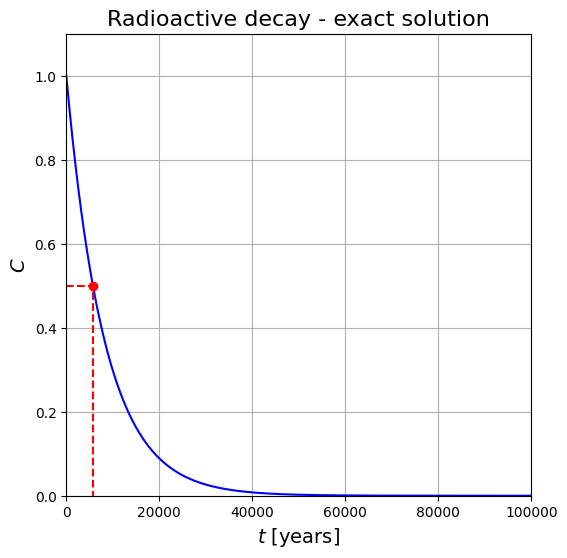

In [61]:
Cr = 0.0
C0 = 1.0
C_14_half_life = 5730. #  our temporal units here are years
# and the following is how you turn a "half life value" into a "decay constant"
K = np.log(2.)/C_14_half_life 

# let's plot things over 100,000 years
t = np.arange(0., 100000., 1.)

def Cex(t):
    """Function to evaluate the exact solution to the exponential decay problem.

    Parameters
    ----------
    t : numpy.ndarray or float
        Times

    Returns
    -------
    numpy.ndarray or float
        Function values for times given
    """ 
    return (Cr + (C0-Cr)*np.exp(-K*t))

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(t, Cex(t), 'b')

# red dashed lines and dot emphasise the meaning of "half life"
ax1.plot([5730], [0.5], 'ro')
ax1.plot([0, 5730, 5730], [0.5, 0.5, 0], 'r--')

ax1.set_xlabel(r'$t$ [years]', fontsize = 14)
ax1.set_ylabel(r'$C$', fontsize = 14)
ax1.set_title('Radioactive decay - exact solution', fontsize = 16)
ax1.grid(True)
ax1.set_xlim(0,100000)
ax1.set_ylim(0,1.1);

Your task is to apply our forward Euler solver to this problem numerically/approximately. 

First you should construct a function to conduct forward Euler time stepping.  I suggest you use as a template the function from the lecture

```Python
def time_step(alpha, x0, t0, t_max, dt):
    """Implement simple time-stepper

    Parameters
    ----------
    alpha : float
        A problem parameter
    x0 : float
        Initial condition
    t0 : float
        Initial time
    t_max : float
        The last time step
    dt : float
        Timestep size

    Returns
    -------
    tuple of ndarray
        Tuple containing numpy arrays with all x and t values within
        the specified interval
    """
    x = np.array(x0)
    t = np.array(t0)
    x_all = [x0]
    t_all = [t0]  
    while t < t_max:
        # start from the most recent value
        x = x_all[-1]
        x = x + dt * logistic_rhs(alpha, x)
        x_all.append(x) 
        t = t + dt
        t_all.append(t)
    return np.array(x_all), np.array(t_all)
```

<br>

but update this to the more general form 

<br>


```Python
def forward_euler(f, y0, t0, t_max, dt):
    """Forward Euler time stepper

    Parameters
    ----------
    f
        RHS function expected to be of the form f=f(t,y)
    y0 : float
        Initial y value
    t0 : float
        Initial time
    t_max : float
        The last timestep
    dt : float
        Timestep size

    Returns
    -------
    tuple of ndarray
        Tuple containing numpy arrays with all y and t values within
        the specified interval
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
       .
       . 
       . 
    return np.array(y_all), np.array(t_all)
```      

<br>


where you pass in a function `f` representing the RHS of our ODE.

<br>


Once you've done this try performing the following tasks:
    
    
1. Demonstrate the correct solution behaviour by plotting the numerical and analytical solutions on the same plot


2. Perform a convergence analysis - plot errors vs time step on a log-log plot


3. See if you can get the SciPy ODE sovler `solve_ivp` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) to solve this problem and compare errors as a function of time (use a semi-log plot) between this and forward Euler.


<br>


NB. I used the following parameters:
```Python
# set some physical parameters
K = 0.04
Cr = 20
C0 = 5
```

For the first part of the question I integrated up to time 200 to show consistent long term bahaviour.

For parts two and three I integrated up to time 40 to consider errors before the long term behaviour kicked in.

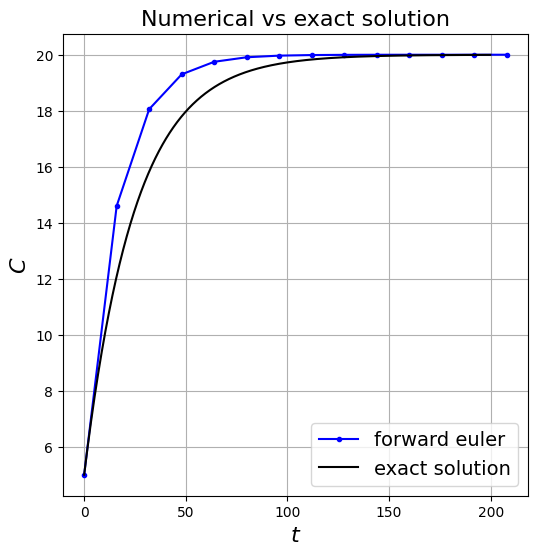

In [66]:
K = 0.04
Cr = 20
C0 = 5

dt = 16
t0 = 0
tf = 200

def forward_euler(f,y0,t0,t_max,dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t  < t_max:
        y = y + dt * f(t,y)
        y_all.append(y)
        t = t+ dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f(t,C):
    val = K * (Cr - C)
    return val

C_all , t_all = forward_euler(f,C0,t0,tf,dt)

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(111)
ax1.plot(t_all, C_all, 'b.-', label='forward euler')

def Cex(t):
    return (Cr + (C0-Cr)*np.exp(-K*t))

t_fine = np.arange(0,tf,dt/100)
ax1.plot(t_fine, Cex(t_fine), 'k', label='exact solution')
ax1.set_xlabel(r'$t$', fontsize=16)
ax1.set_ylabel(r'$C$', fontsize=16)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

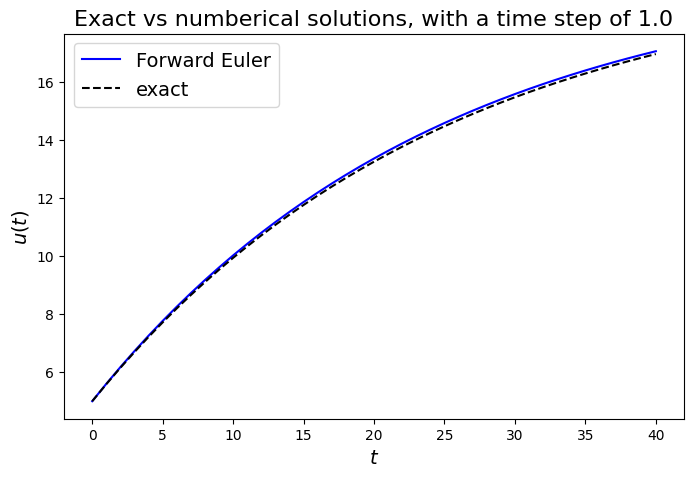

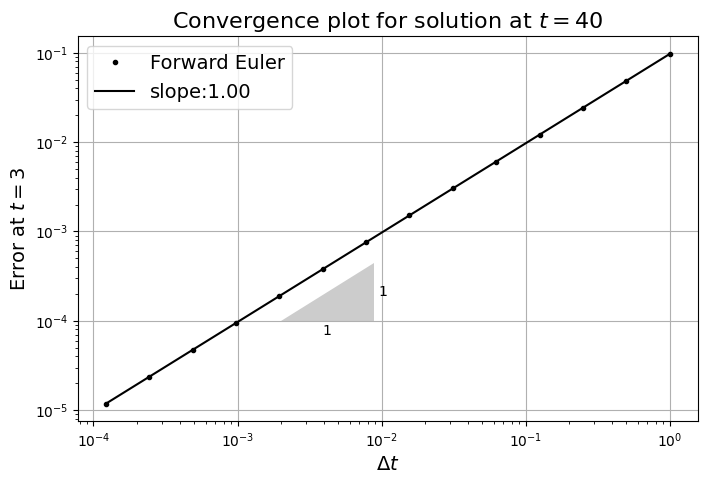

In [70]:
K = 0.04
Cr = 20
C0 = 5

t0 = 0
tf = 40

fig,ax1 = plt.subplots(1,1,figsize=(8,5))

dt = 1.
uall, tall = forward_euler(f,C0,t0,tf,dt)
ax1.plot(tall, uall, 'b', label='Forward Euler')
ax1.plot(tall, Cex(tall), 'k--', label='exact')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('Exact vs numberical solutions, with a time step of {0:.5}'.format(dt),fontsize=16)
ax1.legend(loc='best', fontsize=14)

def approx_error(dt,t_max):
    uall, tall = forward_euler(f,C0, t0,t_max,dt)
    err1 = abs(uall[-1] - Cex(tall[-1]))
    return err1

error_fe = []
dt_array = []
dt = 1
while dt > 1.e-4:
    dt_array.append(dt)
    err1 = approx_error(dt,tf)
    error_fe.append(err1)
    dt *= 0.5
    
fig, ax1 = plt.subplots(1,1,figsize=(8,5))
ax1.loglog(dt_array,error_fe,'k.', label = 'Forward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for solution at $t=40$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-3,1.e-4),(1,1),ax=ax1,size_frac=0.15,pad_frac=0.05)

start_fit = 4
line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]),np.log(error_fe[start_fit:]),1)
ax1.loglog(dt_array,np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-',label='slope:{:.2f}'.format(line_fit_fe[0]))
ax1.legend(loc='best', fontsize=14)

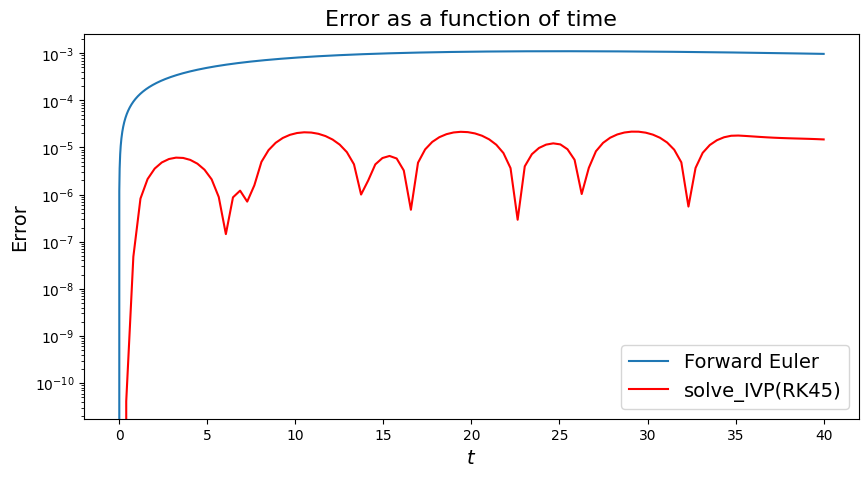

In [75]:
from scipy.integrate import solve_ivp

K = 0.04
Cr = 20
C0 = 5

t0 = 0
tf = 40
def f(t,C):
    val = K * (Cr - C)
    return val

def Cex(t):
    return (Cr + (C0-Cr)*np.exp(-K*t))

fig,ax1 = plt.subplots(1,1,figsize=(10,5))
dt = 0.01
uall, tall = forward_euler(f,C0,t0,tf,dt)
ax1.semilogy(tall, np.abs(uall-Cex(tall)), label='Forward Euler')

ts = np.linspace(t0, tf, 100)
tol = 1.e-5
sol = solve_ivp(f,[t0,tf],(C0,), method='RK45', t_eval=ts, rtol=tol,atol=tol)

ax1.plot(ts, np.abs(sol.y[0,:] - Cex(ts)), 'r', label='solve_IVP(RK45)')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Error as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14)

<div class="optional">

## Homework - Fibonacci numbers [*]

Consider the Fibonacci nunmbers:

$$ 0 \;  1 \; 1 \; 2 \; 3 \; 5 \; 8 \; 13 \; 21 \; \ldots$$

Let's label them $F_i$, $i=0,1,\ldots$.  

Then initialising with $F_0=0$, $F_1=1$ allows us to define all of the Fibonacci numbers via the recurrence relation

$$F_{i+1} = F_i+F_{i-1}$$

write a function to compute any Fibonacci number.

After checking the result yourself for the first 20 or so numbers, 

and supposing that Google can be trusted, search for the 1000th Fibonacci number online and check your solver against this value

e.g. this resource seems correct: <http://www.fullbooks.com/The-first-1001-Fibonacci-Numbers.html>

<br>
    
If your first few numbers are correct, but you can't get the 1000th, don't worry we will look at the reasons this might happen in a later lecture and some fixes.

</div>

In [79]:
def compute_fib_number(n):
    F_i_minus_1 = 0
    if n==0: return 0
    Fi = 1
    if n==1: return 1
    F_i_plus_1 = 0
    for i in range(n-1):
        F_i_plus_1 = Fi + F_i_minus_1
        F_i_minus_1 = Fi
        Fi = F_i_plus_1
    return F_i_plus_1

print([compute_fib_number(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [80]:
truth = 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

print(compute_fib_number(1000)==truth)

True
